In [2]:
import pandas as pd
from matplotlib import pyplot

In [107]:
df = pd.read_csv('BikesHistData.csv', header=0, index_col=0)

In [108]:
df.head()

,FENIAN_STREET,CITY_QUAY,FITZWILLIAM_SQUARE_EAST,BROOKFIELD_ROAD,EMMET_ROAD,ROTHE_ABBEY,KING_STREET_NORTH,GREEK_STREET,WESTERN_WAY,CHARLEMONT_PLACE,...,ST._JAMES_HOSPITAL_(CENTRAL),HEUSTON_BRIDGE_(NORTH),MOUNT_BROWN,CHATHAM_STREET,GRANTHAM_STREET,GRATTAN_STREET,HARDWICKE_STREET,HATCH_STREET,GOLDEN_LANE,CLARENDON_ROW
DATETIME,,,,,,,,,,,,,,,,,,,,,
2017-01-23 22:49:45,1,0,0,30,33,29,30,19,24,33,...,10,31,22,13.0,12,0,7,0,0,NaN
2017-01-23 22:58:10,1,0,0,30,33,29,30,19,24,33,...,10,31,22,17.0,12,0,6,0,0,NaN
2017-01-23 23:08:08,1,1,0,30,33,29,30,19,26,32,...,10,31,22,15.0,13,1,6,0,0,NaN
2017-01-23 23:18:09,1,1,0,29,34,29,30,18,32,32,...,10,31,22,15.0,13,1,6,0,0,NaN
2017-01-23 23:28:09,1,1,0,21,35,29,30,18,32,32,...,10,31,22,15.0,12,1,6,0,0,NaN


DATETIME
2017-01-23 22:49:45    30
2017-01-23 23:48:09    25
2017-01-24 00:44:08    28
2017-01-24 01:44:09    28
2017-01-24 02:44:08    28
2017-01-24 03:44:08    28
2017-01-24 04:44:09    28
2017-01-24 05:44:09    28
2017-01-24 06:44:09    17
2017-01-24 07:44:09    16
Name: NORTH_CIRCULAR_ROAD, dtype: int64


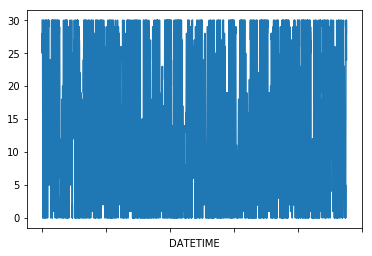

In [102]:
series = df['NORTH_CIRCULAR_ROAD'][::6]
print(series.head(10))
series.plot()
pyplot.show()

In [101]:
series.head()

DATETIME
2017-01-23 22:49:45    30
2017-01-23 22:58:10    30
2017-01-23 23:08:08    24
2017-01-23 23:18:09    22
2017-01-23 23:28:09    21
Name: NORTH_CIRCULAR_ROAD, dtype: int64

In [18]:
# select time series forecast model

In [19]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
import numpy

Test MSE: 4.757


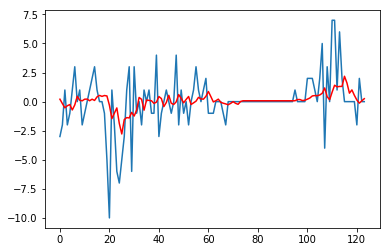

In [93]:
# create a difference transform of the dataset
def difference(dataset):
    diff = list()
    for i in range(1, len(dataset)):
        value = dataset[i] - dataset[i - 1]
        diff.append(value)
    return numpy.array(diff)
 
# Make a prediction give regression coefficients and lag obs
def predict(coef, history):
    yhat = coef[0]
    for i in range(1, len(coef)):
        yhat += coef[i] * history[-i]
    return yhat

df = pd.read_csv('BikesHistData.csv', header=0, index_col=0)
series = df['GRAND_CANAL_DOCK'][1000:1365]
# split dataset
X = difference(series.values)
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:]
# train autoregression
model = AR(train)
model_fit = model.fit(maxlag=6, disp=False)
window = model_fit.k_ar
coef = model_fit.params
# walk forward over time steps in test
history = [train[i] for i in range(len(train))]
predictions = list()
for t in range(len(test)):
    yhat = predict(coef, history)
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [28]:
# Finalize and Save Time Series Forecast Model

In [94]:
from pandas import read_csv
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.ar_model import ARResults
import numpy
 
# create a difference transform of the dataset
def difference(dataset):
	diff = list()
	for i in range(1, len(dataset)):
		value = dataset[i] - dataset[i - 1]
		diff.append(value)
	return numpy.array(diff)
 
# load dataset
df = read_csv('BikesHistData.csv', header=0, index_col=0)
series = df['GRAND_CANAL_DOCK']
X = difference(series.values)
# fit model
model = AR(X)
model_fit = model.fit(maxlag=150, disp=False)
# save model to file
model_fit.save('ar_model.pkl')
# save the differenced dataset
numpy.save('ar_data.npy', X)
# save the last ob
numpy.save('ar_obs.npy', [series.values[-1]])

In [95]:
# load the AR model from file
from statsmodels.tsa.ar_model import ARResults
import numpy
loaded = ARResults.load('ar_model.pkl')
print(loaded.params)
data = numpy.load('ar_data.npy')
last_ob = numpy.load('ar_obs.npy')
print(last_ob)

[ 0.0006333   0.06240084  0.00703684  0.00666585 -0.00730851 -0.01319625
 -0.0027671  -0.01462357 -0.03131185 -0.01464539 -0.02265528 -0.01675912
 -0.00710178 -0.01493699 -0.01389095 -0.01467704 -0.02355842 -0.00507362
 -0.01886709 -0.01784747 -0.01500137 -0.00817443 -0.02079609 -0.02158764
 -0.01335357 -0.01203445 -0.01111537 -0.02026922 -0.00724958 -0.0269094
 -0.00861118 -0.01225795 -0.01449534 -0.02382334 -0.02445249 -0.00943592
 -0.01483461 -0.00230701 -0.01736776 -0.01507588 -0.01599629 -0.00412442
 -0.02395075 -0.01231225 -0.01400959 -0.0160444  -0.01212038 -0.0162505
 -0.02046844 -0.02531223 -0.03196904 -0.02713066 -0.05275768 -0.04085431
 -0.03254596 -0.01992349 -0.03220554 -0.02367275 -0.02570695 -0.02007698
 -0.01031608 -0.00925493 -0.02116263 -0.01378572 -0.0186792  -0.01460084
 -0.01150506 -0.01466734 -0.01601929 -0.01650742 -0.014209   -0.01082319
 -0.02712403 -0.00527244 -0.01084989 -0.01651081 -0.02396816 -0.01540193
 -0.01551416 -0.01005254 -0.01070446 -0.00882496 -0.0

In [96]:
# fit an AR model and manually save coefficients to file
from pandas import read_csv
from statsmodels.tsa.ar_model import AR
import numpy

# create a difference transform of the dataset
def difference(dataset):
	diff = list()
	for i in range(1, len(dataset)):
		value = dataset[i] - dataset[i - 1]
		diff.append(value)
	return numpy.array(diff)

# load dataset
df = read_csv('BikesHistData.csv', header=0, index_col=0)
series = df['GRAND_CANAL_DOCK']
X = difference(series.values)
# fit model
window_size = 150
model = AR(X)
model_fit = model.fit(maxlag=window_size, disp=False)
# save coefficients
coef = model_fit.params
numpy.save('man_model.npy', coef)
# save lag
lag = X[-window_size:]
numpy.save('man_data.npy', lag)
# save the last ob
numpy.save('man_obs.npy', [series.values[-1]])

In [97]:
# load the manually saved model from file
import numpy
coef = numpy.load('man_model.npy')
print(coef)
lag = numpy.load('man_data.npy')
print(lag)
last_ob = numpy.load('man_obs.npy')
print(last_ob)

[ 0.0006333   0.06240084  0.00703684  0.00666585 -0.00730851 -0.01319625
 -0.0027671  -0.01462357 -0.03131185 -0.01464539 -0.02265528 -0.01675912
 -0.00710178 -0.01493699 -0.01389095 -0.01467704 -0.02355842 -0.00507362
 -0.01886709 -0.01784747 -0.01500137 -0.00817443 -0.02079609 -0.02158764
 -0.01335357 -0.01203445 -0.01111537 -0.02026922 -0.00724958 -0.0269094
 -0.00861118 -0.01225795 -0.01449534 -0.02382334 -0.02445249 -0.00943592
 -0.01483461 -0.00230701 -0.01736776 -0.01507588 -0.01599629 -0.00412442
 -0.02395075 -0.01231225 -0.01400959 -0.0160444  -0.01212038 -0.0162505
 -0.02046844 -0.02531223 -0.03196904 -0.02713066 -0.05275768 -0.04085431
 -0.03254596 -0.01992349 -0.03220554 -0.02367275 -0.02570695 -0.02007698
 -0.01031608 -0.00925493 -0.02116263 -0.01378572 -0.0186792  -0.01460084
 -0.01150506 -0.01466734 -0.01601929 -0.01650742 -0.014209   -0.01082319
 -0.02712403 -0.00527244 -0.01084989 -0.01651081 -0.02396816 -0.01540193
 -0.01551416 -0.01005254 -0.01070446 -0.00882496 -0.0

In [34]:
#Make a Time Series Forecast

In [98]:
# load AR model from file and make a one-step prediction
from statsmodels.tsa.ar_model import ARResults
import numpy
# load model
model = ARResults.load('ar_model.pkl')
data = numpy.load('ar_data.npy')
last_ob = numpy.load('ar_obs.npy')
# make prediction
predictions = model.predict(start=len(data), end=len(data))
# transform prediction
yhat = predictions[0] + last_ob[0]
print('Prediction: %f' % yhat)

Prediction: 22.114911


In [99]:
# load a coefficients and from file and make a manual prediction
import numpy
 
def predict(coef, history):
	yhat = coef[0]
	for i in range(1, len(coef)):
		yhat += coef[i] * history[-i]
	return yhat
 
# load model
coef = numpy.load('man_model.npy')
lag = numpy.load('man_data.npy')
last_ob = numpy.load('man_obs.npy')
# make prediction
prediction = predict(coef, lag)
# transform prediction
yhat = prediction + last_ob[0]
print('Prediction: %f' % yhat)

Prediction: 22.114911


22

In [37]:
# Update Forecast Model

In [92]:
# update the data for the AR model with a new obs
import numpy
# get real observation
observation = 48
# load the saved data
data = numpy.load('ar_data.npy')
last_ob = numpy.load('ar_obs.npy')
# update and save differenced observation
diffed = observation - last_ob[0]
data = numpy.append(data, [diffed], axis=0)
numpy.save('ar_data.npy', data)
# update and save real observation
last_ob[0] = observation
numpy.save('ar_obs.npy', last_ob)

48

41